<a href="https://colab.research.google.com/github/madol-abraham/Complete-date-science-and-machine-learning/blob/main/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import all the necesarry libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import dataset
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
# drop month day and year
df.drop(['month', 'day', 'year'], axis=1, inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [8]:
# Enconding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [10]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [11]:
# independent and dependent features
X = df.drop('FWI', axis= 1)
y =df['FWI']

In [12]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [14]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [15]:
X_train.shape , X_test.shape

((182, 11), (61, 11))

In [16]:
# feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.512299,0.296033
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.446906,-0.427696
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,-0.108246,-0.191245
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.393221,-0.086938
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.773444,0.267099
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.629505,0.175711
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.562431,-0.080660
ISI,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.747764,0.312299
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.624037,0.079373
Classes,0.512299,-0.446906,-0.108246,-0.393221,0.773444,0.629505,0.562431,0.747764,0.624037,1.000000,0.201988


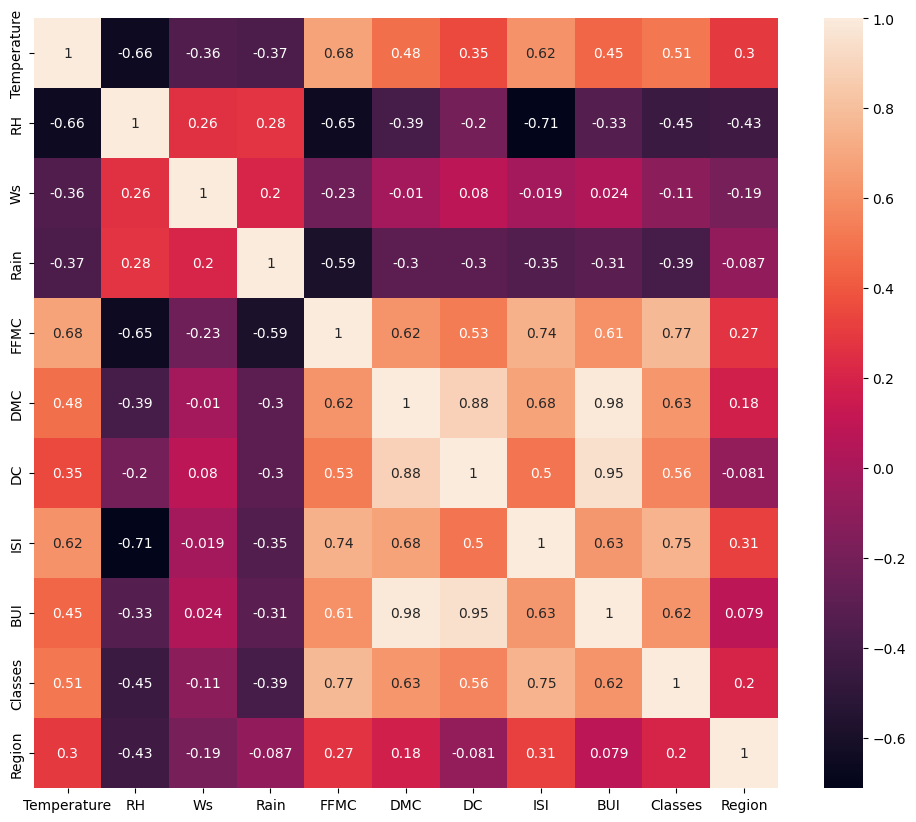

In [17]:
## multicollinearity
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [18]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [20]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

# Feature Scaling Or Standardization

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [22]:
X_train_scaled

array([[ 1.01365171, -1.8394432 , -0.88892151, ...,  0.89709937,
         0.88561489,  1.02222494],
       [ 0.47735924,  0.64088224, -0.54024971, ..., -0.91779112,
        -1.12915898,  1.02222494],
       [ 1.81809043, -1.8394432 ,  0.50576569, ...,  2.75736213,
         0.88561489,  1.02222494],
       ...,
       [-0.32707948, -0.46873704, -1.58626511, ..., -0.57749915,
        -1.12915898, -0.97825827],
       [-0.32707948,  0.44506707, -0.54024971, ..., -0.1010904 ,
         0.88561489, -0.97825827],
       [-0.05893324, -0.86036737,  0.85443749, ...,  1.84991688,
         0.88561489,  1.02222494]])

# Box Plots To understand Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

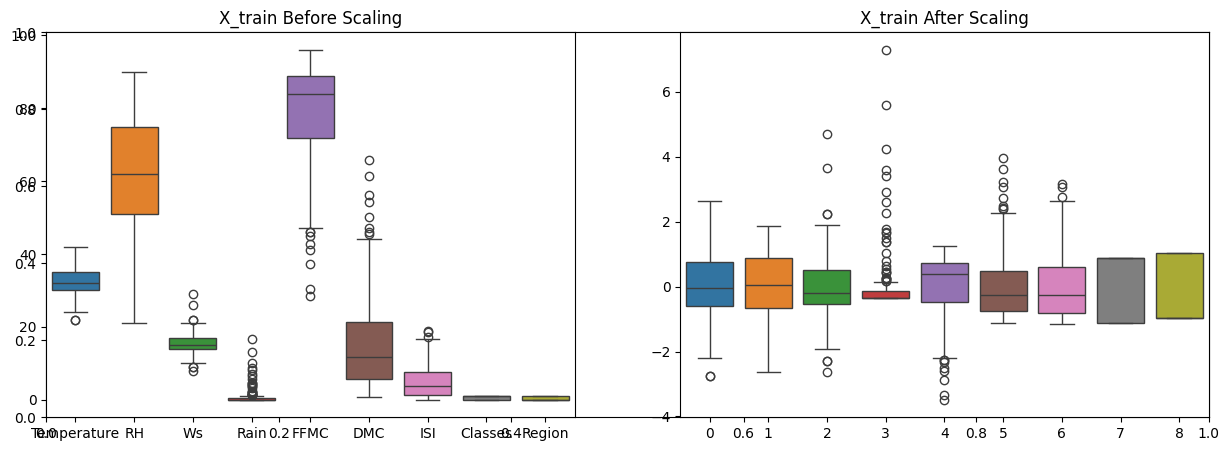

In [23]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# Linear Regression

Mean Absolute Error: 0.6852784521674975
R2 Score: 0.9703973266545678


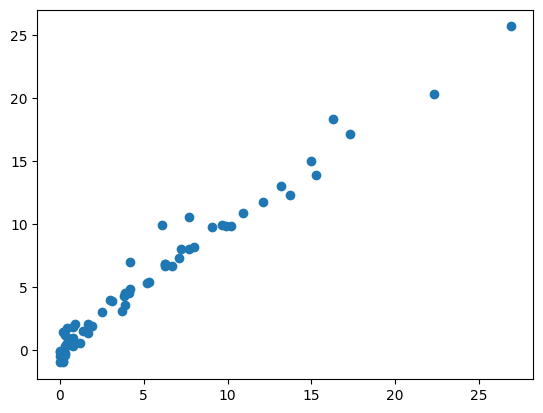

In [33]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)

Lasso Regression model

Mean Absolute Error: 1.1209175798372668
R2 Score: 0.9376608745831527


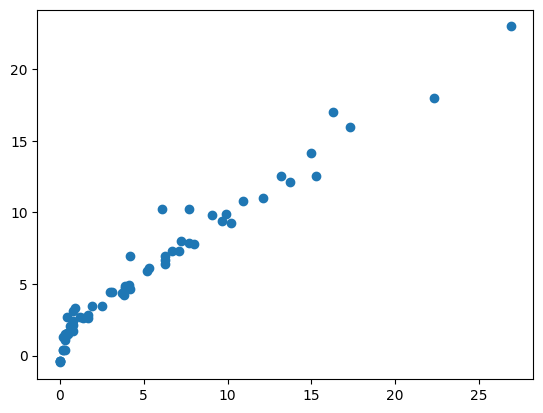

In [32]:
# lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)

# cross validation lasso

In [37]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [39]:
lassocv.alpha_

0.025166943608269078

In [40]:
lassocv.alphas_

array([7.16763581, 6.68456115, 6.2340441 , 5.81389039, 5.42205364,
       5.05662537, 4.71582574, 4.39799487, 4.10158474, 3.82515165,
       3.56734923, 3.32692183, 3.10269844, 2.89358695, 2.69856887,
       2.51669436, 2.34707758, 2.18889241, 2.04136839, 1.90378699,
       1.77547812, 1.65581684, 1.54422032, 1.44014504, 1.34308409,
       1.25256471, 1.16814604, 1.08941691, 1.01599386, 0.94751927,
       0.88365964, 0.82410394, 0.76856209, 0.71676358, 0.66845611,
       0.62340441, 0.58138904, 0.54220536, 0.50566254, 0.47158257,
       0.43979949, 0.41015847, 0.38251517, 0.35673492, 0.33269218,
       0.31026984, 0.28935869, 0.26985689, 0.25166944, 0.23470776,
       0.21888924, 0.20413684, 0.1903787 , 0.17754781, 0.16558168,
       0.15442203, 0.1440145 , 0.13430841, 0.12525647, 0.1168146 ,
       0.10894169, 0.10159939, 0.09475193, 0.08836596, 0.08241039,
       0.07685621, 0.07167636, 0.06684561, 0.06234044, 0.0581389 ,
       0.05422054, 0.05056625, 0.04715826, 0.04397995, 0.04101

In [41]:
lassocv.mse_path_

array([[71.93873449, 42.85246783, 65.39195434, 48.29045179, 76.87755703],
       [68.28495462, 37.80622919, 59.52588047, 44.40188659, 74.12619007],
       [61.24278042, 32.97160105, 54.3351212 , 39.04586154, 66.34684563],
       [54.30034826, 28.76962133, 49.73769743, 33.5901418 , 59.56098931],
       [47.86283402, 25.1175118 , 45.66190475, 28.92526315, 52.508325  ],
       [42.23811385, 21.94373261, 42.04500242, 24.94287365, 46.07492343],
       [37.32192069, 19.18567899, 37.05309492, 21.54903147, 40.47095689],
       [33.02332033, 16.78904468, 32.57256075, 18.66244311, 35.5884093 ],
       [29.26392665, 14.70660751, 28.66325191, 16.21249476, 31.33459323],
       [25.97465105, 12.89718486, 25.25166236, 14.13830229, 27.62775878],
       [23.09557745, 11.32533521, 22.27373686, 12.38710529, 24.39713811],
       [20.57450524,  9.95986948, 19.67371132, 10.91329882, 21.58114908],
       [18.36595018,  8.77379473, 17.40239386,  9.67736508, 19.12590564],
       [16.42997436,  7.74364148, 15.4

Mean Absolute Error: 1.8193555979007134
R2 Score: 0.8575522912954434


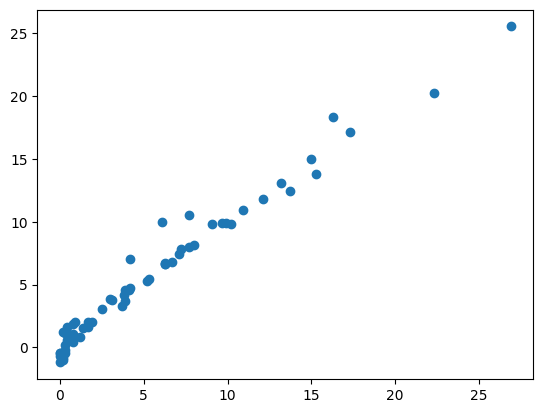

In [43]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("R2 Score:", score)

Mean Absolute Error: 0.7126268400578158
R2 Score: 0.969205102211881


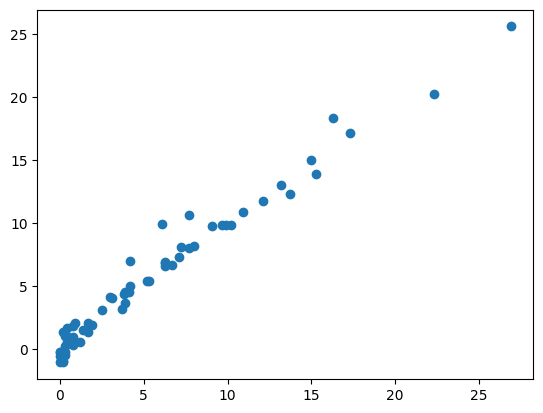

In [31]:
# Ridge regression model
# linear regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)

Mean Absolute Error: 0.7126268400578158
R2 Score: 0.969205102211881


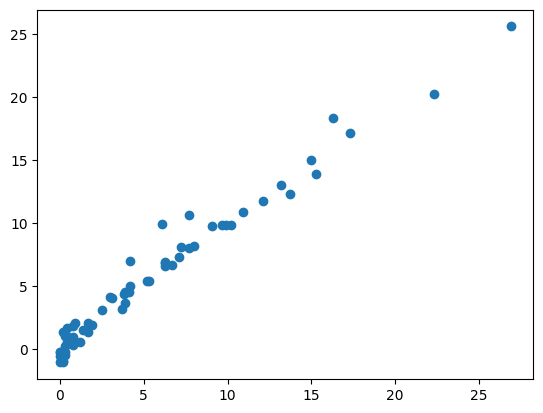

In [44]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("R2 Score:", score)

In [46]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

Elasticnet Regression

Mean Absolute Error: 1.8193555979007134
R2 Score: 0.8575522912954434


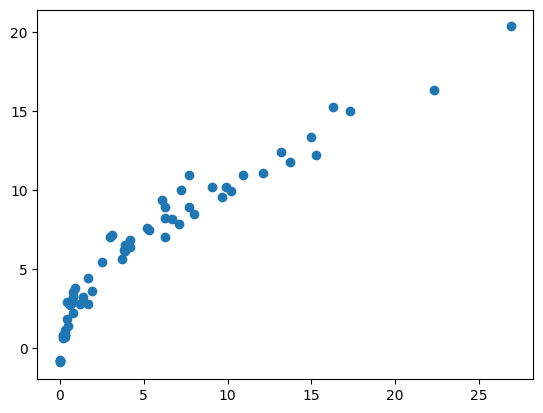

In [35]:
# Elasticnet
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled, y_train)
y_pred = elasticnet.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)

Mean Absolute Error: 1.8193555979007134
R2 Score: 0.8575522912954434


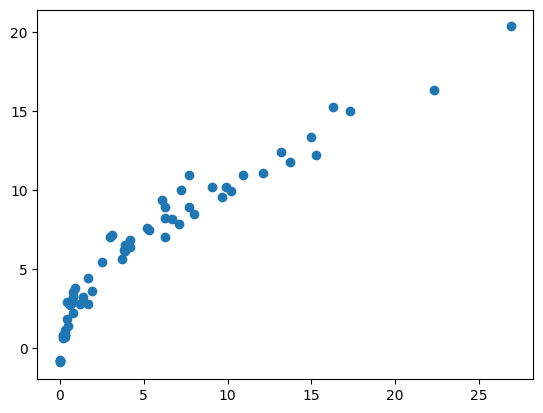

In [47]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled, y_train)
y_pred= elasticnet.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("R2 Score:", score)

In [49]:
elasticnetcv.alphas_

array([14.33527162, 13.36912229, 12.46808819, 11.62778078, 10.84410727,
       10.11325073,  9.43165148,  8.79598974,  8.20316947,  7.6503033 ,
        7.13469846,  6.65384367,  6.20539687,  5.78717389,  5.39713774,
        5.03338872,  4.69415517,  4.37778482,  4.08273678,  3.80757398,
        3.55095624,  3.31163367,  3.08844065,  2.88029008,  2.68616817,
        2.50512943,  2.33629209,  2.17883382,  2.03198771,  1.89503854,
        1.76731929,  1.64820788,  1.53712419,  1.43352716,  1.33691223,
        1.24680882,  1.16277808,  1.08441073,  1.01132507,  0.94316515,
        0.87959897,  0.82031695,  0.76503033,  0.71346985,  0.66538437,
        0.62053969,  0.57871739,  0.53971377,  0.50333887,  0.46941552,
        0.43777848,  0.40827368,  0.3807574 ,  0.35509562,  0.33116337,
        0.30884406,  0.28802901,  0.26861682,  0.25051294,  0.23362921,
        0.21788338,  0.20319877,  0.18950385,  0.17673193,  0.16482079,
        0.15371242,  0.14335272,  0.13369122,  0.12468088,  0.11